In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

# IRIS DATASET

In [4]:
iris = datasets.load_iris()
iris_df=pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names']+['target']) #np.c_ is the numpy concatenate function
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
X=iris_df.iloc[:,:-1]
y=iris_df.iloc[:, -1]

In [7]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

## Split into training and testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   shuffle=True,
                                                   random_state=0)
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)
X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

In [11]:
print(f"training set size: {X_train.shape[0]} samples \ntest set size:{X_test.shape[0]} samples")

training set size: 120 samples 
test set size:30 samples


In [12]:
#Normalizing the dataset
scaler=Normalizer().fit(X_train)
normalised_X_train=scaler.transform(X_train)
normalized_X_test=scaler.transform(X_test)

In [13]:
print("X_train before Normalization")
print(X_train[0:5])
print("\nX_train after Normalization")
print(normalised_X_train[0:5])

X_train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

X_train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Text(0.5, 1.08, 'Pair plot of the dataset After normalization')

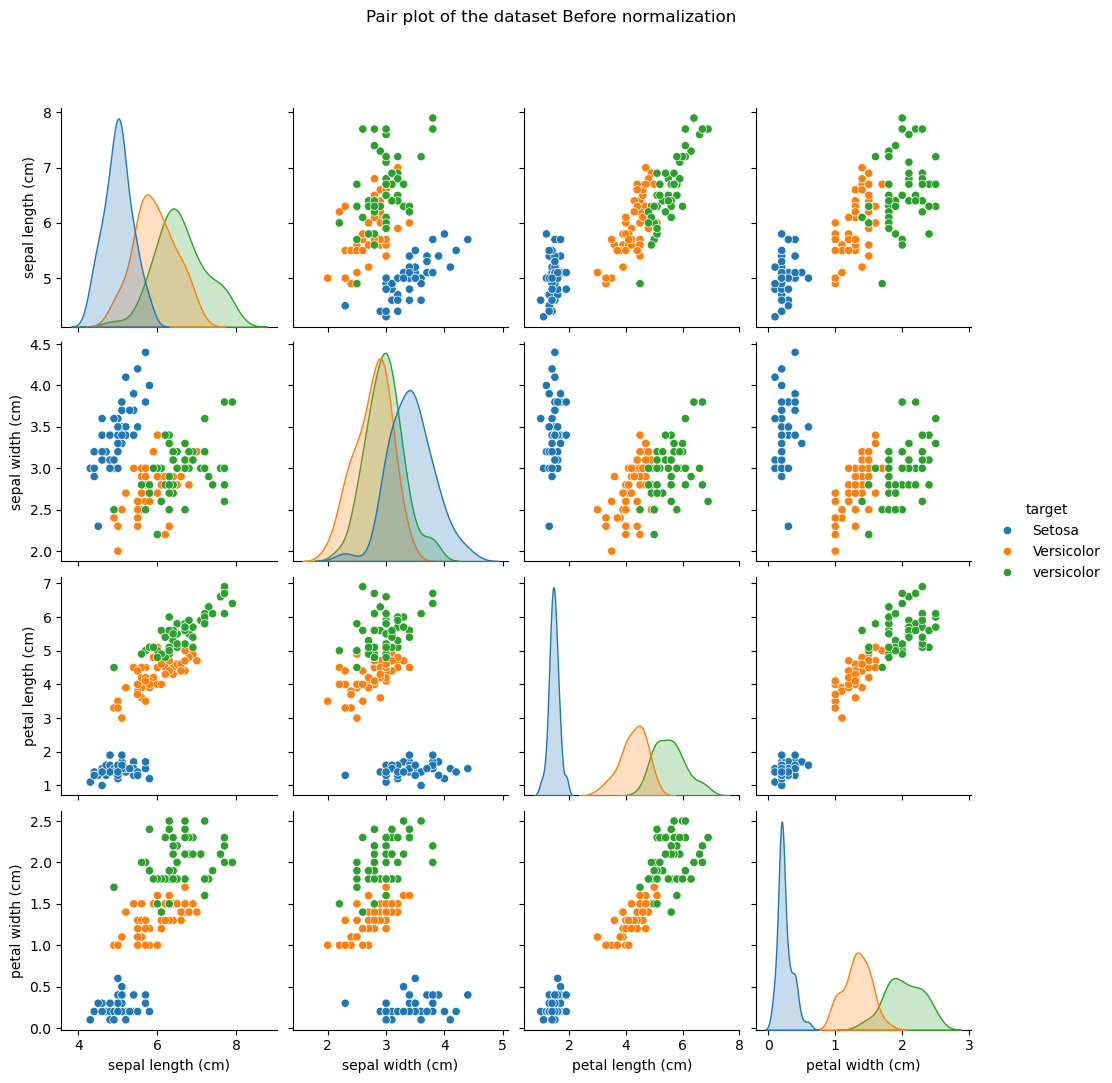

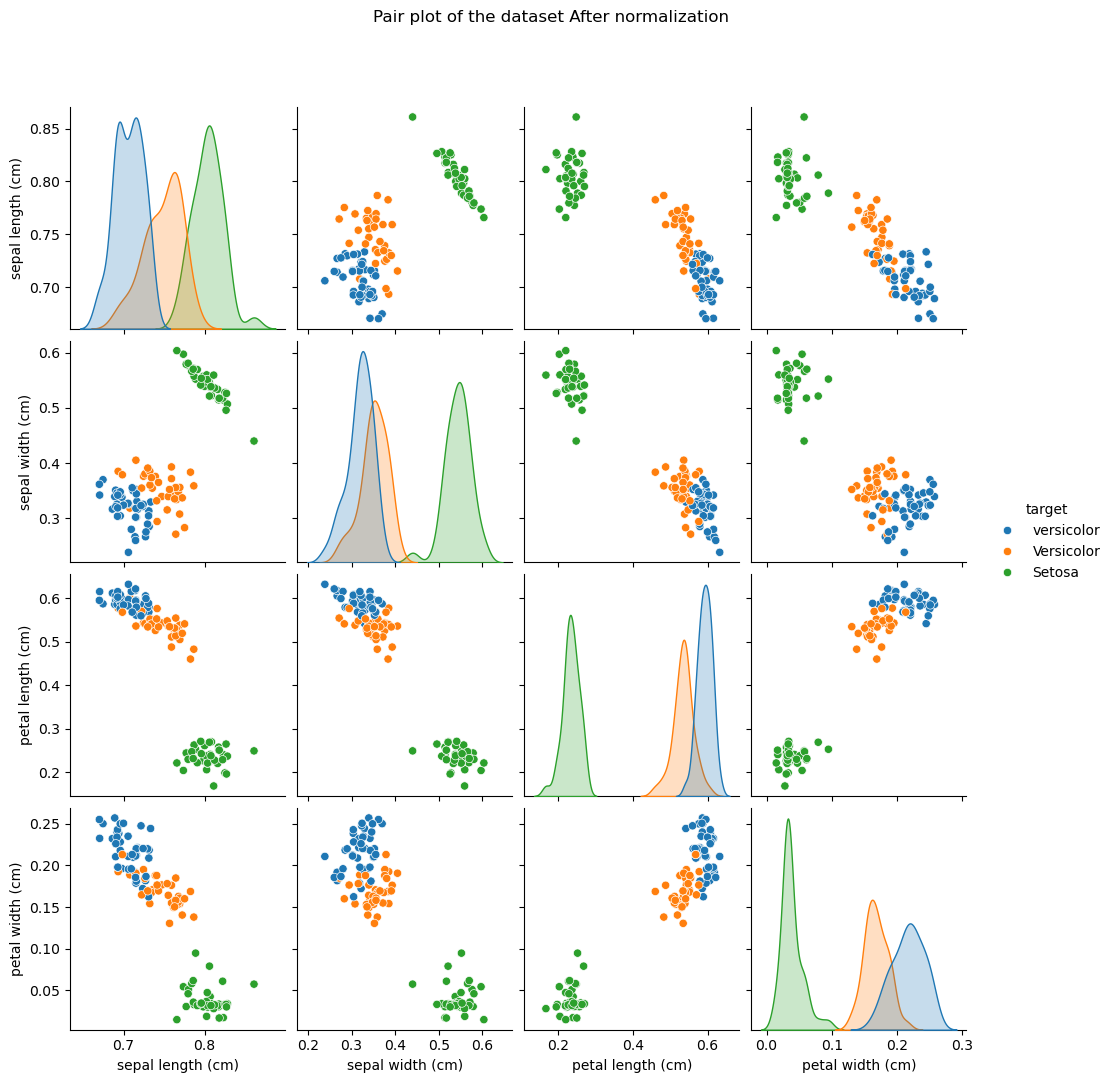

In [14]:
#Visualizing

#before normalization
di={0.0: "Setosa", 1.0: "Versicolor", 2.0: "versicolor"}
before=sns.pairplot(iris_df.replace({"target":di}), hue='target')
before.fig.suptitle("Pair plot of the dataset Before normalization", y=1.08)

#after normalization
iris_df_2=pd.DataFrame(data=np.c_[normalised_X_train, y_train],
                      columns=iris['feature_names']+['target'])
di={0.0: "Setosa", 1.0: "Versicolor", 2.0: "versicolor"}
after=sns.pairplot(iris_df_2.replace({"target":di}), hue='target')
after.fig.suptitle("Pair plot of the dataset After normalization", y=1.08)

In [15]:
# Implementing KNN from scratch

def distance_ecu(x_train, x_test_point):
    """
    Input:
        - X_train: corresponding to the training data
        - x_test_point: corresponding to the test point

    Output:
        - distances: The distances between the test point and each point in the training data
    """
    distances=[]
    for row in range(len(x_train)):## Loop over the rows of X train
        current_train_point = x_train[row] # Get them point by point
        current_distance=0 ## Initialize the distance by zero

        for col in range(len(current_train_point)): ##loop over the columns of the row

            current_distance += (current_train_point[col] - x_test_point[col])**2
        current_distance=np.sqrt(current_distance)

        distances.append(current_distance)## Append the distances
    #store distances in a dataFrame
    distances = pd.DataFrame(data=distances, columns=['dist'])
    return distances

In [16]:
#Finding the nearest neighbors

def nearest_neighbors(distance_point, K):
    """
    Input: 
        - distance_point: The distances between the test point and each point in the training data
        - K             : The number of neighbors

    Output:
        -df_nearest: The nearest K neighbors between the test point and the training data
    """
    #Sort distances using the sort_values function
    df_nearest = distance_point.sort_values(by=['dist'], axis=0)

    #Take only the first K neighbors
    df_nearest = df_nearest[:K]
    return df_nearest

In [17]:
#Classify the point based on a majority vote

def voting(df_nearest, y_train):
    """
    Input:
        - df_nearest: Dataframe contains the nearest K neighbors between the full training dataset and the test point
        - y_train: The labels of the training dataset
    Output:
        - y_pred: The prediction based on Majority voting
    """
    ## Use the counter object to get the labels with K nearest neighbours
    counter_vote = Counter(y_train[df_nearest.index])

    y_pred=counter_vote.most_common()[0][0] #Major Voting

    return y_pred

In [18]:
#Putting everything together

def KNN_from_scratch(x_train, y_train, x_test, K):
    """
    input:
    - x_train: The full training dataset
    - y_train: The labels of the training dataset
    - x_test: The full test dataset
    - K: the number of Neighbors

    Output: 
    -y_pred: the prediction for the whole test set based on majority voting
    """
    y_pred=[]

    ##Loop over all the test set  and perform the three steps
    for x_test_point in x_test:
        distance_point = distance_ecu(x_train, x_test_point)#step one
        df_nearest_point = nearest_neighbors(distance_point, K)#step two
        y_pred_point= voting(df_nearest_point, y_train)#step three
        y_pred.append(y_pred_point)
    return y_pred

## Testing the KNN algorithm on the test dataset

In [20]:
K=3
y_pred_scratch=KNN_from_scratch(normalised_X_train, y_train, normalized_X_test, K)
print(y_pred_scratch)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [44]:
#Compare with sklearn

knn=KNeighborsClassifier(K)
knn.fit(normalised_X_train, y_train)
y_pred_sklearn = knn.predict(normalized_X_test)
print(y_pred_sklearn)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [46]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True


In [50]:
#Calculate the accuracy of both methods

print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 0.9666666666666667
The accuracy of sklearn implementation is 0.9666666666666667
